# ПРОЕКТНАЯ РАБОТА: АНАЛИЗ БИЗНЕС-ПОКАЗАТЕЛЕЙ #

### 1. Загрузите данные и подготовьте их к анализу

- Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.
- Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

**Описание проекта.**
Вы — маркетинговый аналитик развлекательного приложения `Procrastinate Pro+`. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.
Вам предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Описание данных.**
В вашем распоряжении три датасета. 
Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

Структура `visits_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

Структура `orders_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

Структура `costs_info_short.csv`:
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

In [1]:
# импортирую необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
# считываю данные в переменные visits, orders, costs
try:
    visits, orders, costs = (
        pd.read_csv('/datasets/visits_info_short.csv'),
        pd.read_csv('/datasets/orders_info_short.csv'),
        pd.read_csv('/datasets/costs_info_short.csv')
    )
except:
    visits, orders, costs = (
        pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv'),
        pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')
    )

Провожу первичное ознакомление с таблицамим, соответствие типов данным к тем, что показаны в колонках и смотрю пропуски, сразу проверяю данные на явные дубликаты.

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
visits.duplicated().sum()

0

Явные дубликаты в файле `visits` отсутствуют, пропущенных данных тоже нет. Необходимо будет преобразовать данные о времени в столбцах `Session Start` и `Session End`. В остальных столбцах типы данных корректны.

In [6]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
orders.duplicated().sum()

0

Явные дубликаты в файле `orders` отсутствуют, пропущенных данных тоже нет. Необходимо будет преобразовать данные о времени в столбцe `Event Dt`. В остальных столбцах типы данных корректны.

In [9]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [11]:
costs.duplicated().sum()

0

Явные дубликаты в файле `costs` отсутствуют, пропущенных данных тоже нет. Необходимо будет преобразовать данные о времени в столбцe `dt`. В остальных столбцах типы данных корректны.

Так же во всех трех таблицах для удобства восприятия и дальнейшей работы необходимо привести к единому регистру названия столбцов.

In [12]:
# привожу названия столбцов к нижнему регистру
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

In [13]:
# переименовываю столбцы с пробелами в названии
visits = visits.rename(columns={'user id' : 'user_id',
                                'session start' : 'session_start',
                                'session end' : 'session_end'})

In [14]:
orders = orders.rename(columns={'user id' : 'user_id',
                                'event dt' : 'event_dt'})

In [15]:
# преобразовываю данные о времени в выделенных выше столбцах
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Делаю дополнительную проверку на неявные дубликаты.

In [16]:
display(visits['region'].unique())
display(visits['device'].unique())
display(visits['channel'].unique())
display(costs['channel'].unique())

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

**Итог по разделу.** Загрузил необходимые библиотеки для работы, считал данные и ознакомился с ними. По итогу названия столбцов были приведены к единому регистру, столбцы с датами и времени были приведены к нужному типу данных, остальные колонки в изменении типа данных не нуждались. Пропущенных данных нет, так же отсутствуют явные дубликаты в данных. Дополнительная проверка на неявные дубликаты проблем не выявила.

### 2. Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии
Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

**Сначала задаю функции для вычисления метрик.**

In [17]:
# функция для создания профилей пользователей
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

# находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

# для когортного анализа определяем дату первого посещения и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

# добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

# добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

# считаем количество уникальных пользователей# с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

# объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

# делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

# добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

# стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [18]:
# функция для для подсчёта Retention Rate
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

# добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

# исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

# собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

# функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

# получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

# получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

# возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [19]:
# функция для подсчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

# исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

# определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

# добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

# рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

# группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

# функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
# делим каждую «ячейку» в строке на размер когорты# и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

# получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

# для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

# получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

# возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [20]:
# функция для подсчёта LTV
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

# исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
# добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
# рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
# группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

# функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
# строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
# находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
# вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
# объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
# считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
# исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
# восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

# собираем датафрейм с данными пользователей и значениями CAC,# добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

# считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

# считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

# удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

# восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

# добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

# в финальной таблице оставляем размеры когорт, CAC# и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

# возвращаем таблицы LTV и ROI
        return result, roi

# получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

# для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

# получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,# сырые данные
        result_grouped,# таблица LTV
        result_in_time,# таблица динамики LTV
        roi_grouped,# таблица ROI
        roi_in_time,# таблица динамики ROI
    )

**Задаю функции для построения графиков.**

In [21]:
# функция для сглаживания данных
def filter_data(df, window):
# для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

In [22]:
# функция для построения графика Retention Rate
def plot_retention(retention, retention_history, horizon, window=7):

# задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

# исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
# в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

# если в индексах таблицы удержания только payer,# добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

# в таблице графиков — два столбца и две строки, четыре ячейки# в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

# во второй ячейке строим кривые удержания неплатящих# вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

# в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
# получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
# фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

# в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
# фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

In [23]:
# функция для построения графика конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

# задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

# исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
# в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

# первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

# второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
# столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [24]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

# задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

# из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
# в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

# стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

# из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
# в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

# первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

# второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
# столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

# третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
# столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

# четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

# пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
# столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## 3. Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [25]:
events = None # чтоб не сломать функцию get_profiles добавляю None в значение events

In [26]:
# создаю профили пользователей и смотрю получившийся результат 
profiles = get_profiles(visits, orders, events, costs)
display(profiles.head(5))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [27]:
# определяю минимальную дату привлечения пользователей.
min_date = profiles['dt'].min()
print('Минимальная дата привлечения пользователей:', min_date)

Минимальная дата привлечения пользователей: 2019-05-01


In [28]:
# определяю максимальную дату привлечения пользователей.
max_date = profiles['dt'].max()
print('Максимальная дата привлечения пользователей:', max_date)

Максимальная дата привлечения пользователей: 2019-10-27


Создал новую табличку с профилями пользователей. Первый пользователь был привлечен `01 мая 2019`, а последний `27 октября 2019`.
Структура `profiles`:

- `user_id` — уникальный идентификатор пользователя,
- `first_ts` — дата и время первой покупки,
- `channel` — идентификатор источника перехода,
- `device` — тип устройства пользователя,
- `region` — страна пользователя,
- `dt` — дата первой покупки,
- `month` — месяц первой покупки,
- `payer` — признак платящего пользователя,
- `acquisition_cost` — рекламные расходы на привлеченного пользователя.

In [29]:
# создал функцию для подсчета платящих пользователей
def payers_pie_2(value):
    value_users = (
        profiles.groupby(value)
        .agg({'user_id' : 'count', 'payer' : 'sum'})
        .rename(columns={'user_id':'Количество пользователей', 'payer' : 'Платящие пользователи'})
    )
    value_users['% Платящих пользователей'] = 100 * value_users['Платящие пользователи'] / value_users ['Количество пользователей']
    value_users['% Платящих пользователей'] = value_users['% Платящих пользователей'].round(2)
    value_users = value_users.sort_values('% Платящих пользователей', ascending=False)
    sns.set_style('darkgrid')
    plt.rc('axes', labelsize=15)
    ax1 = plt.subplot(2, 2, 1)
    plt.title('Доля пользователей для ' + value + ' (в %)', fontsize=17, pad=110)
    value_users['Количество пользователей'].plot(kind='pie', radius=2, autopct="%.2f", ax=ax1);
    ax2 = plt.subplot(2, 2, 2)
    plt.title('Доля платящих для ' + value + ' (в %)', fontsize=17, pad=110)
    value_users['Платящие пользователи'].plot(kind='pie', radius=2, autopct="%.2f", ax=ax2);
    plt.tight_layout(pad=4.0)
    display(value_users)
    plt.show()

,Количество пользователей,Платящие пользователи,% Платящих пользователей
region,,,
United States,100002,6902,6.90
Germany,14981,616,4.11
UK,17575,700,3.98
France,17450,663,3.80


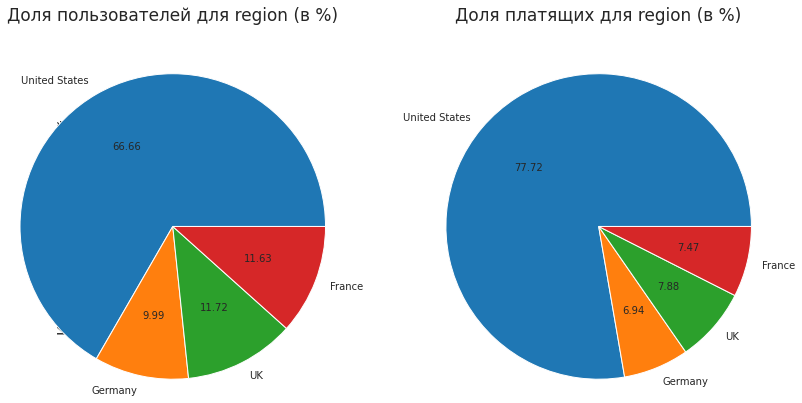

In [30]:
# количество и доля платящих пользователей для каждой страны
plt.figure(figsize=(12,10))
payers_pie_2('region')

Основная масса платящих пользователей приходится на `United States`. Что свидетельствует либо о большей платежеспособности, либо о проблемах с рекламной кампанией в других странах.

,Количество пользователей,Платящие пользователи,% Платящих пользователей
device,,,
Mac,30042,1912,6.36
iPhone,54479,3382,6.21
Android,35032,2050,5.85
PC,30455,1537,5.05


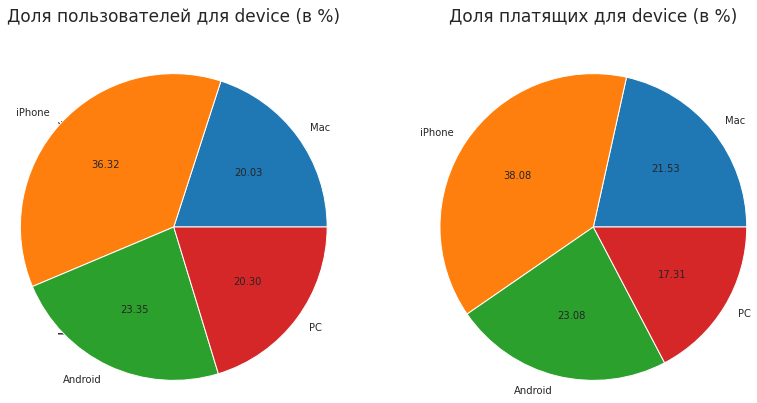

In [31]:
# количество и доля платящих пользователей для каждого устройства
plt.figure(figsize=(12,10))
payers_pie_2('device')

Наибольшая доля платящих пользователей приходится на владельцев `iPhone`, что хорошо коррелирует с распространенностью данной платформы. Распределение по платформам достаточно равномерное. Конверсия в платящих пользователей почти одинаковая.

,Количество пользователей,Платящие пользователи,% Платящих пользователей
channel,,,
FaceBoom,29144,3557,12.20
AdNonSense,3880,440,11.34
lambdaMediaAds,2149,225,10.47
TipTop,19561,1878,9.60
RocketSuperAds,4448,352,7.91
WahooNetBanner,8553,453,5.30
YRabbit,4312,165,3.83
MediaTornado,4364,156,3.57
LeapBob,8553,262,3.06


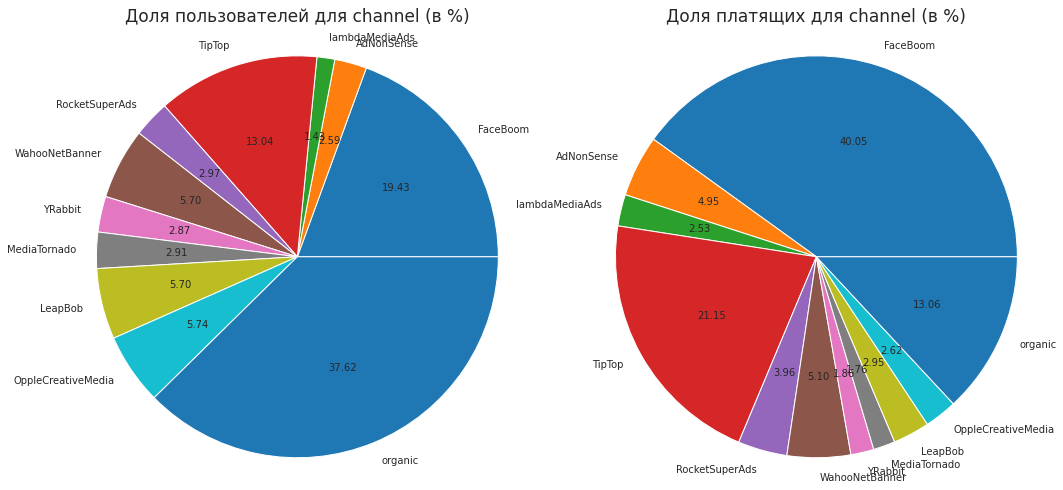

In [32]:
# количество и доля платящих пользователей для каждого канала привлечения
plt.figure(figsize=(15,12));
payers_pie_2('channel')

С большим отрывом по количеству платящих пользователей принесла рекламная платформа `FaceBoom` (с самой высокой конверсией 12%). В два раз меньше смогла привлечь плафторма `TipTop`. С учетом того, что 37% всех пользователей составляют органические, они принесли 13% от всех платящих пользователей( при самой низкой конверсии, всего 2%). Остальные рекламные плафтормы справляются хуже, по крайней мере по количеству пользователей.

Подводя небольшие итоги можно отметить, что Основная масса платящих пользователей приходится на `United States`, что может свидетельствать об их хорошей платежеспособности, о том, что среди пользователей в данной стране приложение пользуется спросом, о проблемах рекламной кампании в других странах, направленностью рекламной кампании именно на этот регион. Больше всего пользователей используют приложение на мобильных платформах, в первую очерердь на платформе `iPhone`. Больше половины платящих пользователей привлекли рекламные платформы `FaceBoom` и `TipTop` ( особенно тут выделяется платформа `FaceBoom`). Неплохую долю платящих пользователей, составляют самостоятельно пришедшие пользователи, особенно на фоне остальной части рекламных платформ, но это скорее из-за своей многочисленности.

## 4. Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [33]:
# общая сумма затрат на маркетинг
all_costs = costs['costs'].sum().round()
print('Общая сумма затрат на маркетинг составляет:', all_costs)

Общая сумма затрат на маркетинг составляет: 105497.0


In [34]:
# распределение трат по рекламным источникам с процентным соотношением
costs_on_channel = (
    costs.groupby('channel')
    .agg({'costs' : 'sum'})
    .sort_values('costs',ascending=False)
)
costs_on_channel['percent'] = 100 * costs_on_channel['costs'] / all_costs
costs_on_channel['percent'] = costs_on_channel['percent'].round(2)
display(costs_on_channel)

,costs,percent
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


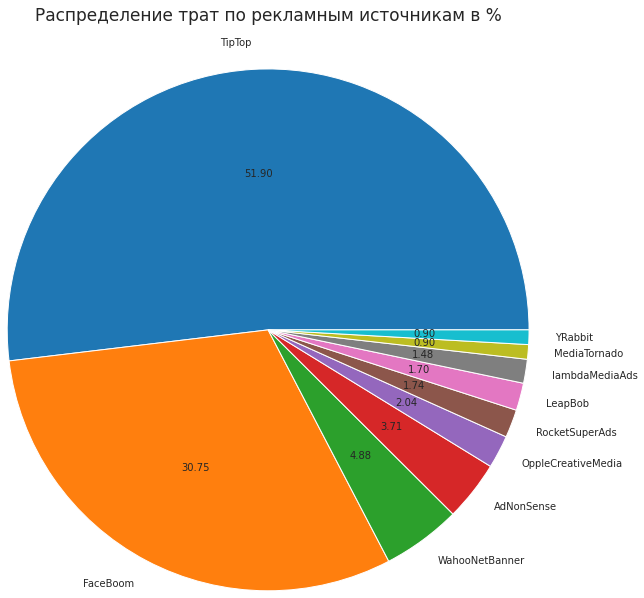

In [35]:
# визуализирую распределение трат по рекламным источникам
costs_on_channel['percent'].plot(kind='pie', radius=3, autopct="%.2f");
plt.title('Распределение трат по рекламным источникам в %', pad=200, fontsize=17);

In [36]:
# создаю дополнительные столбцы с месяцем и неделей
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

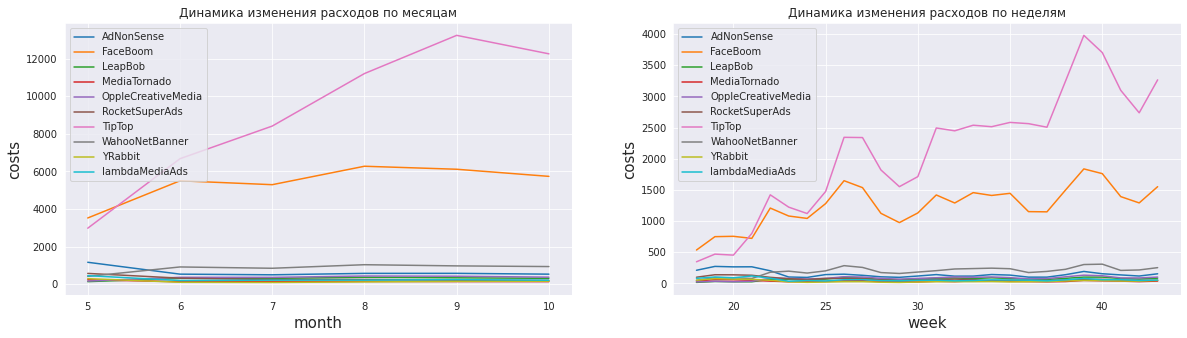

In [37]:
# визуализация динамики изменения расходов по неделям и месяцам по каждому источнику
plt.subplots(figsize = (20, 5))
costs_month = costs.groupby(['month','channel']).agg({'costs' : 'sum'})
ax1 = plt.subplot(1, 2, 1)
sns.lineplot(data=costs_month, x='month', y='costs', hue='channel', ax=ax1);
plt.legend(loc=2)
costs_week = costs.groupby(['week','channel']).agg({'costs' : 'sum'})
ax2 = plt.subplot(1, 2, 2)
sns.lineplot(data=costs_week, x='week', y='costs', hue='channel', ax=ax2);
plt.legend(loc=2)
ax1.set_title('Динамика изменения расходов по месяцам');
ax2.set_title('Динамика изменения расходов по неделям');
plt.grid(True)
plt.tight_layout
plt.show();

In [38]:
# подсчитываю сколько в среднем стоило привлечение одного пользователя
mean_costs = (
    profiles.query('channel != "organic"')
    .groupby('channel')
    .agg({'acquisition_cost' : 'mean'})
    .reset_index()
    .sort_values('acquisition_cost', ascending=False)
)
display(mean_costs)

,channel,acquisition_cost
6,TipTop,2.799003
1,FaceBoom,1.113286
0,AdNonSense,1.008054
9,lambdaMediaAds,0.724802
7,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
4,OppleCreativeMedia,0.250000
8,YRabbit,0.218975
3,MediaTornado,0.218717
2,LeapBob,0.210172


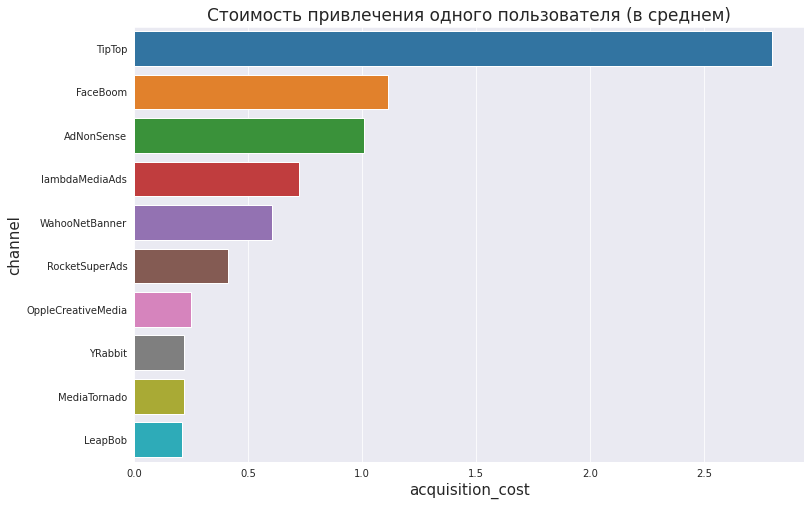

In [39]:
# визуализирую  сколько в среднем стоило привлечение одного пользователя
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.rc('axes', labelsize=15)
plt.title('Стоимость привлечения одного пользователя (в среднем)', fontsize=17)
sns.barplot(data=mean_costs, y='channel', x='acquisition_cost');

In [40]:
# для сравнения расчитываю средний САС на одного пользователя для всего проекта
mean_acq = profiles['acquisition_cost'].mean()
print('Средний САС на одного пользователя:', mean_acq)

Средний САС на одного пользователя: 0.7032778251826568


**Итоги по разделу.** Всего на маркетинг было затрачено 105497 денежных единиц, из них почти 52% пришлось на рекламную платформу `TipTop` и почти 32% на платформу `FaceBoom`. Если `FaceBoom` принесла 40% платящих пользователей, то `TipTop`всего 21% за тот же период. Как видно из графиков динамики вложений, во все платформы затраты были относительно стабильными, кроме платформы  `TipTop`, количество вложений постоянно росло. Особенно много было затрачено средств во все платформы в сентябре месяце, по всей видимости кампания решила просто увеличить затраты на рекламу. Самая дорогая стоимость привлечения пользователя через рекламную платформу `TipTop`, в ней стоимость затрат почти в три раза выше чем у ближайшей `FaceBoom`. Самое дешевое привлечение происходит через рекламную платформу `LeapBob`. Уже сейчас заметно, что вложения в `TipTop` слишком большие, а конверсия в платящих пользователей в сравнении даже с `FaceBoom` слишком низкая для таких затрат. В сравнении со средним САС реклама у трех каналов (`AdNonSense`, `FaceBoom`, `TipTop`) выглядит слишком затратной.

## 5. Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Для дальнейшего анализа именно окупаемости рекламы я отсеку органических платящих пользователей, т.к. они могут исказить данные, учитывая, что их 13% общего числа платящих пользователей. Для этого внесу изменения в таблицу profiles.

In [41]:
profiles_pay = profiles.query('channel != "organic"')

In [42]:
observation_date = datetime(2019, 11, 1).date() # задаю момент анализа
horizon_days = 14 # задаю горизонт анализа

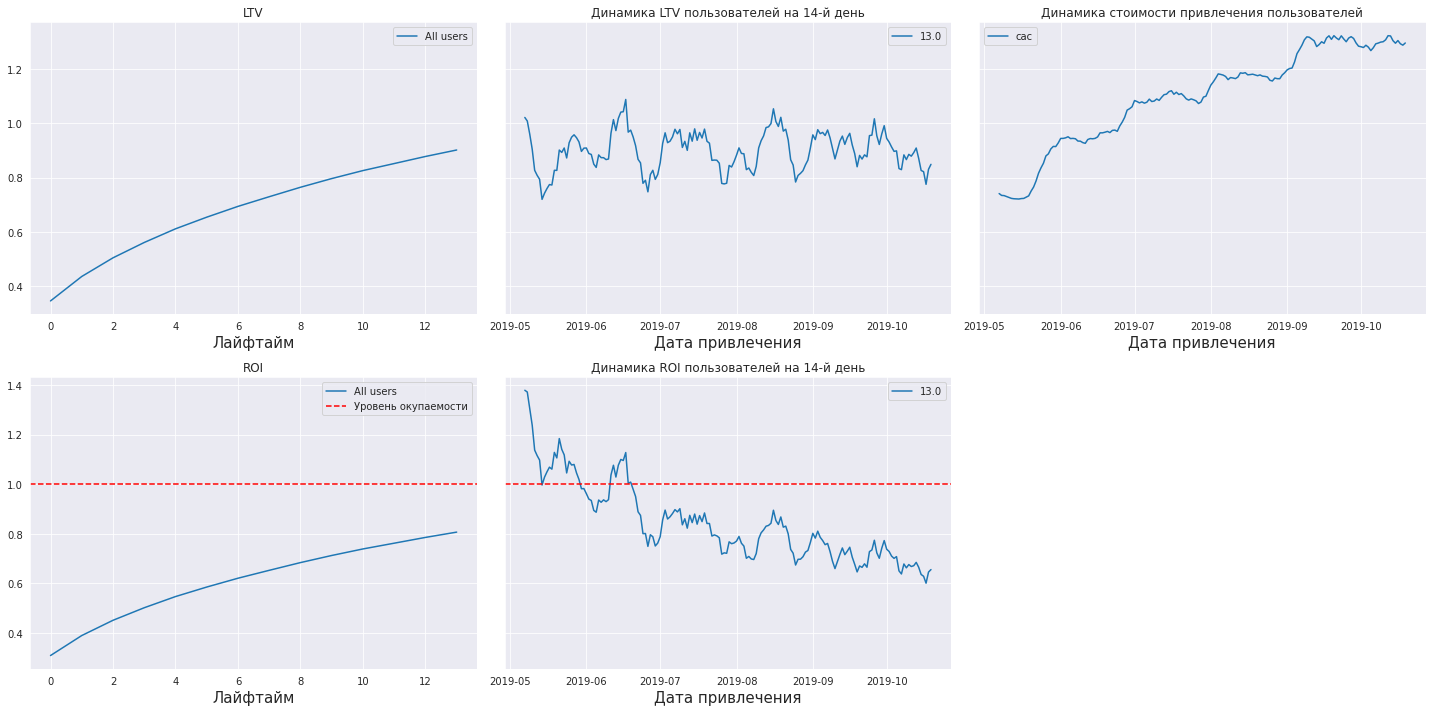

In [43]:
# подсчитываю LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_pay, orders, observation_date, horizon_days
)
# строю график по полученным значениям
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По этим графикам можно сделать следующие выводы:
- стоимость привлечения пользователей растет
- реклама не окупается, ROI всего 80%. В динамике видно, что с середины июня окупаемость начала стабильно снижаться, вместе с ростом стоимости привлечения пользователей.
- LTV достаточно стабилен,без резких просадок, значит пользователи стабильно привлекаются.

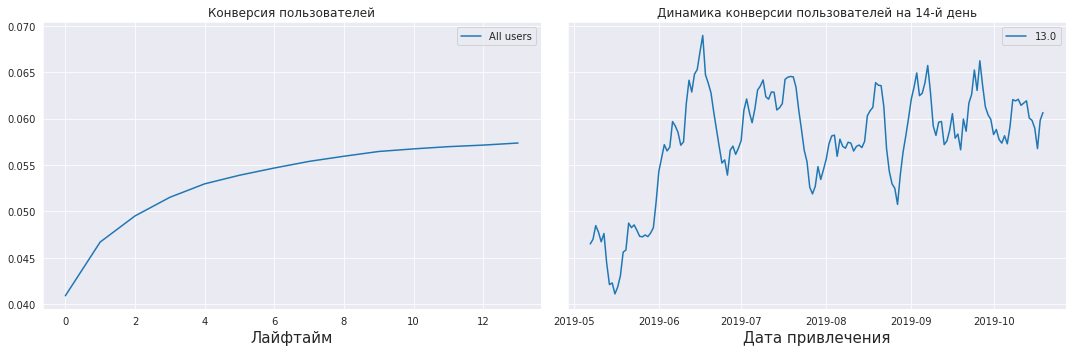

In [44]:
# проверяю конверсию пользователей и динамику ее изменения
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Как видно из графиков, есть резкое увеличение конверсии пользователей после июня,что скорее всего связано с увеличением затрат на рекламу и после этого в целом является стабильной. В целом конверсия пользователей составляет приблизительно 57%.

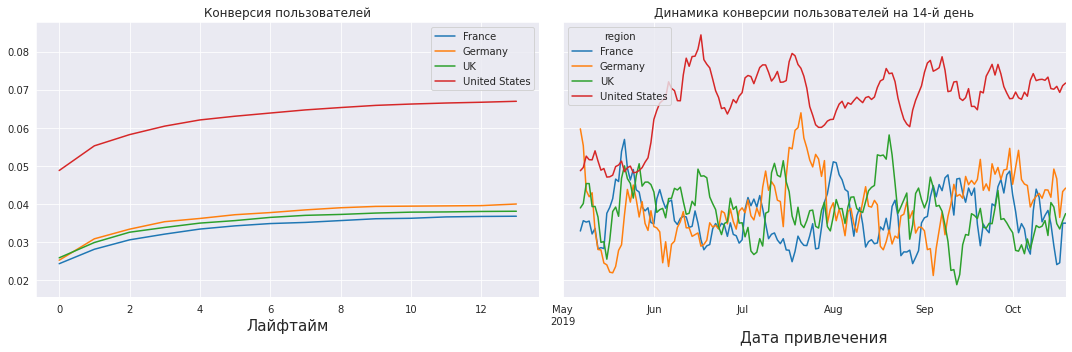

In [45]:
# проверяю конверсию пользователей и динамику ее изменения по стране
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Лучше всего происходит конверсия у пользователей из United States. В остальных странах конверсия очень низкая, скорее всего как следствия недостаточности рекламной кампании.

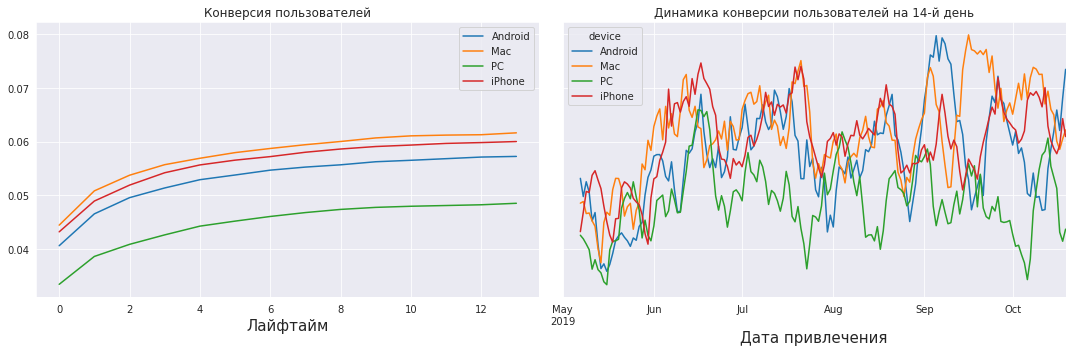

In [46]:
# проверяю конверсию пользователей и динамику ее изменения по используемому устройству
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Хуже всего конвертируются пользователи на PC. В динамике заметен рост конверсии пользователей на Android.

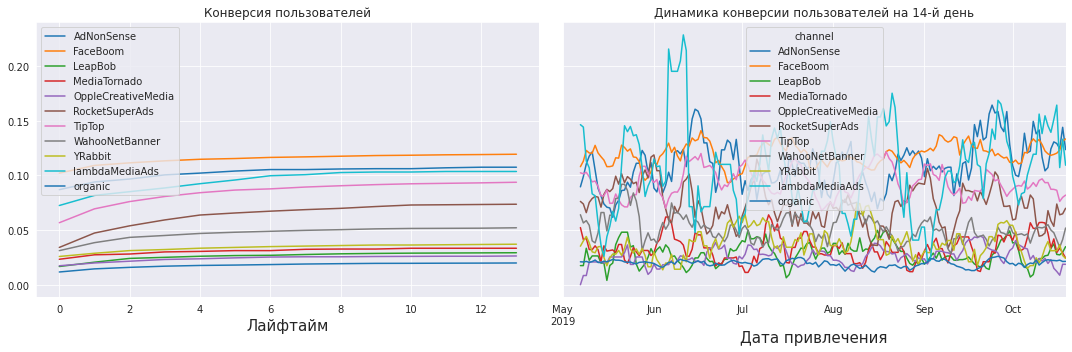

In [47]:
# проверяю конверсию пользователей и динамику ее изменения по рекламной платформе
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Хуже всего конвертируются орагнические пользователи, в динамике на этом же низком уровне движется OppleCreativeMEdia. В динамике хорошо выглядит Leapbob.

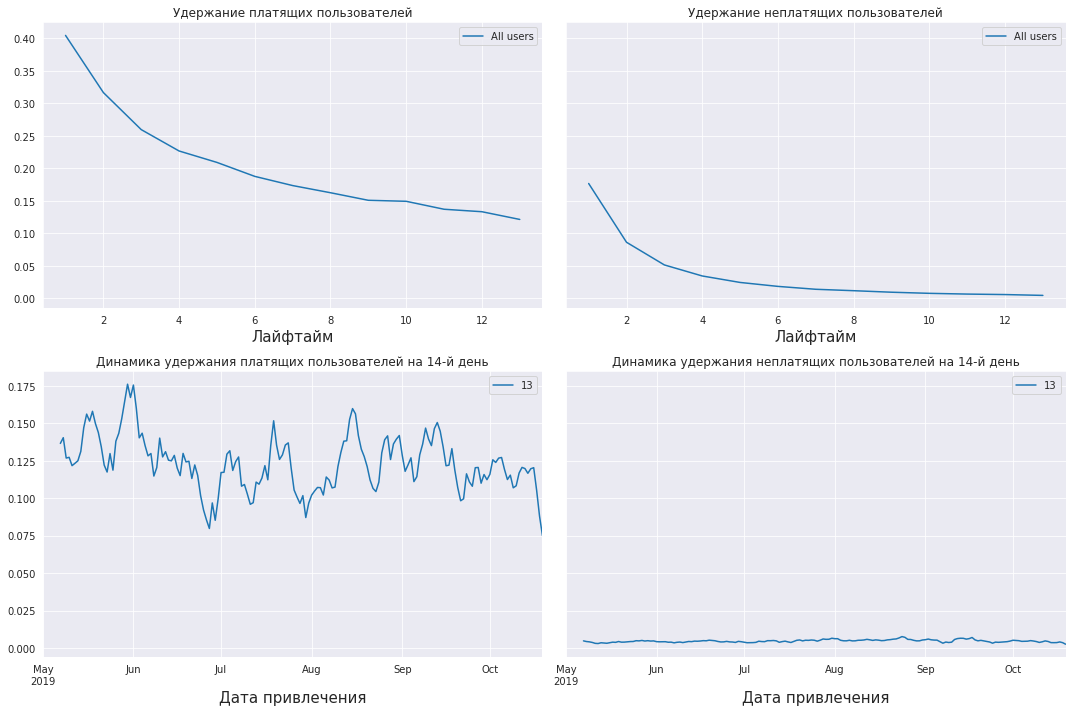

In [48]:
# проверяю удержание пользователей и динамику ее изменения
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

Если платящие пользователи еще в целом удерживаются, то неплатящие пользователи практически не задерживаются. По всей видимости только в платной версии приложения удается удержать интерес пользователя на больший промежуток времени.

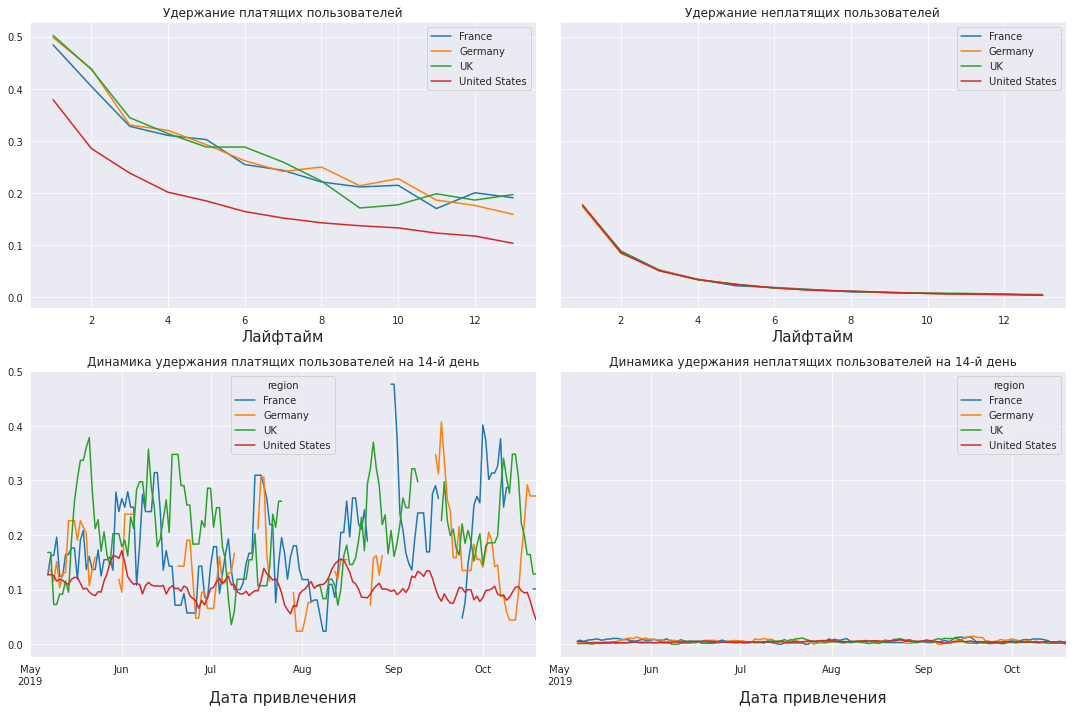

In [49]:
# проверяю удержание пользователей и динамику ее изменения по стране
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Хуже всего удержание платящих пользователей из United States.

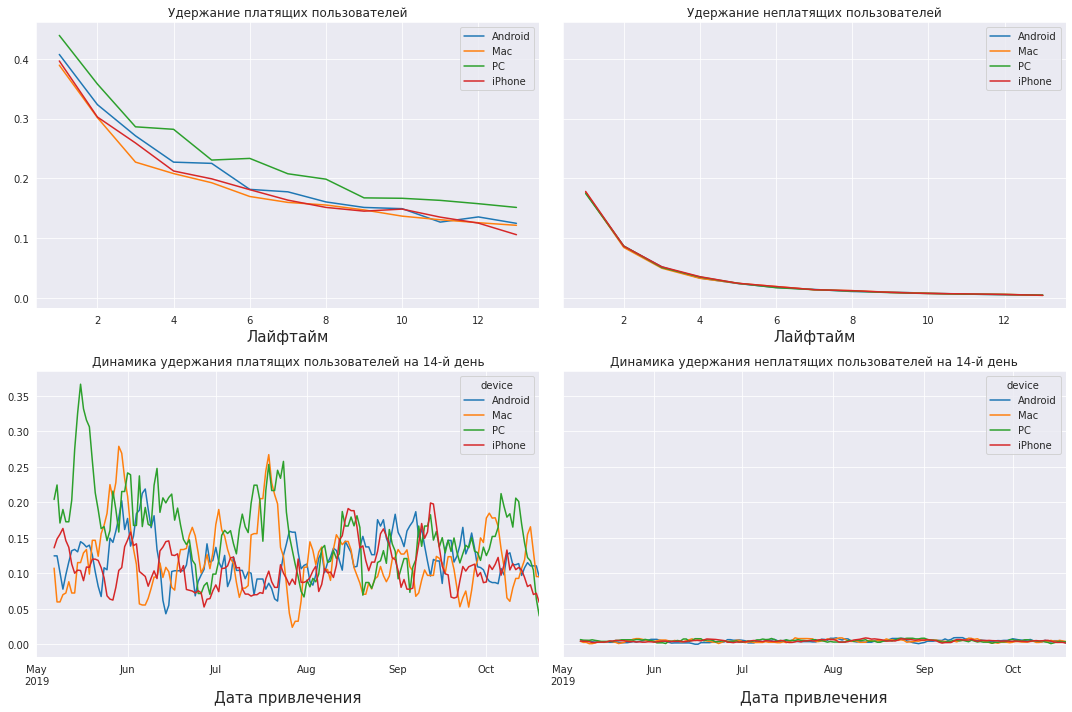

In [50]:
# проверяю удержание пользователей и динамику ее изменения по используемому устройству
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих пользователей хоть и незначительно, но лучше всего у пользователей с PC.

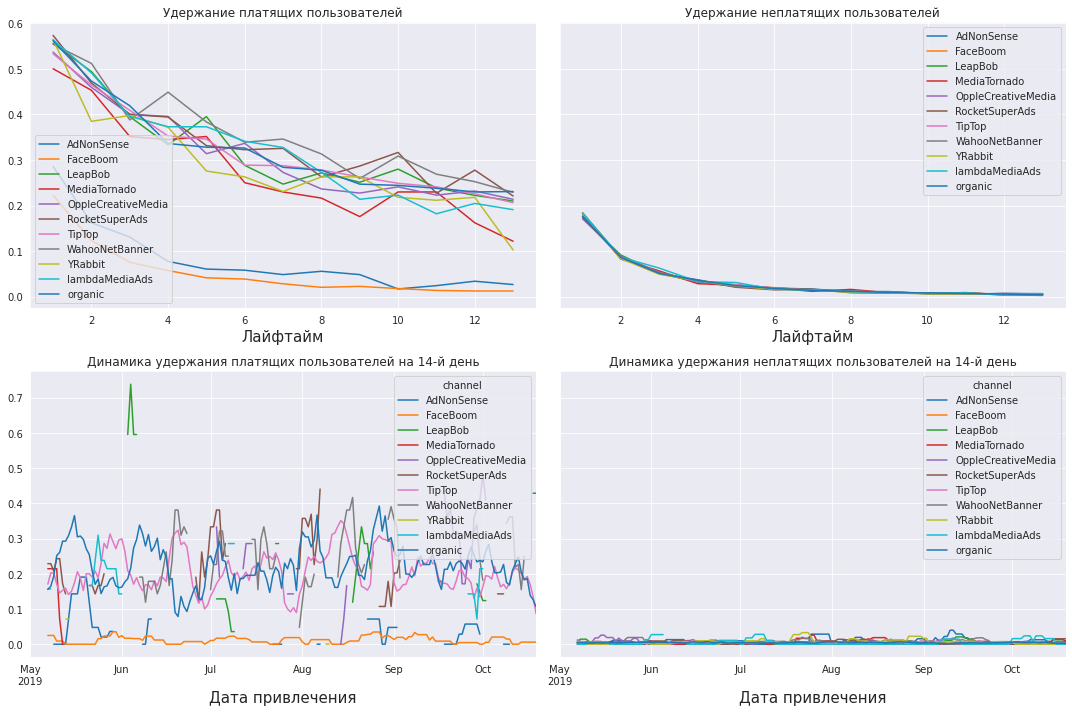

In [51]:
# проверяю удержание пользователей и динамику ее изменения по рекламной платформе
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Совсем не справляются с удержанием платящих пользователей рекламные платформы AdNonSense и FaceBoom.

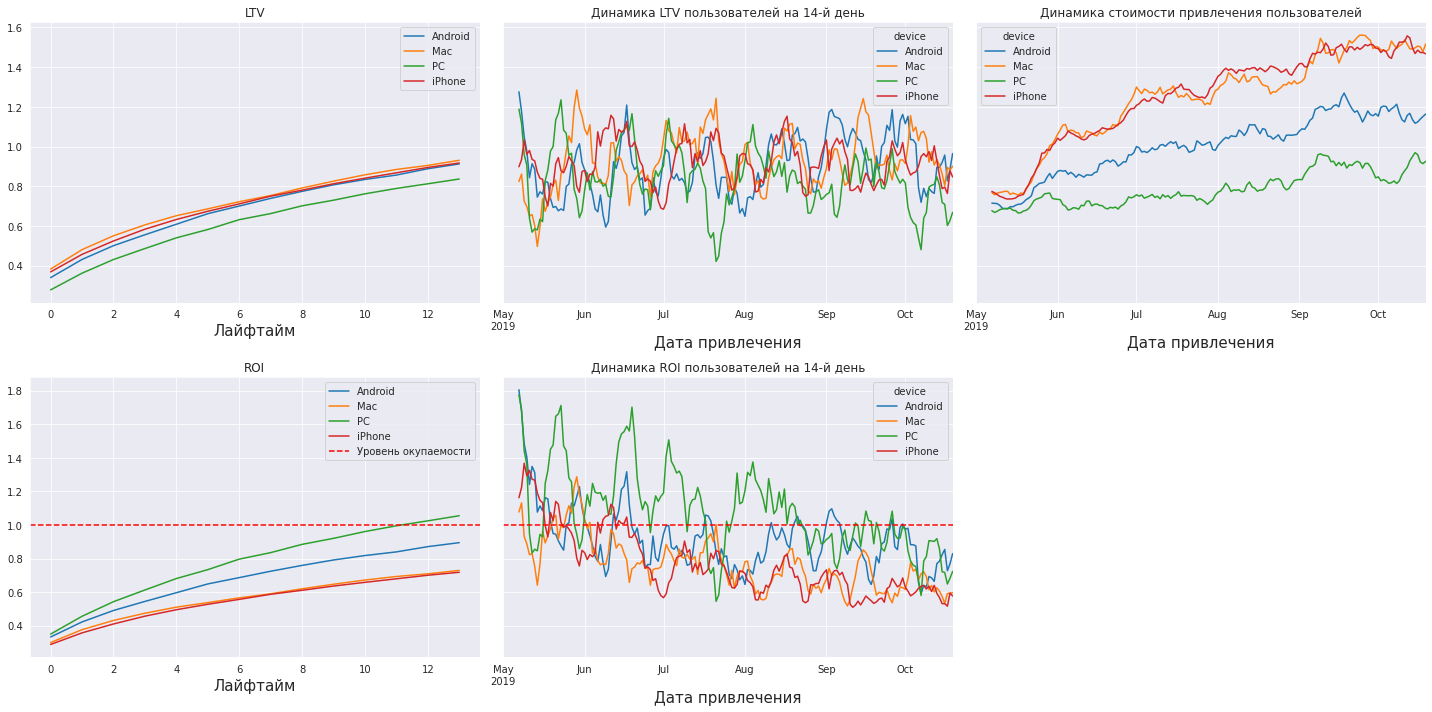

In [52]:
# расчитываю окупаемость рекламы с разбивкой по устройствам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_pay, orders, observation_date, horizon_days, dimensions=['device']
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

- Окупаются только пользователи PC. Окупаемость остальных платформ колеблется в промежутке 70-90%.В динамике видно,что лучше всего с окупаемостью у пользователей PC и Android.
- Стоимость привлечения пользователей выше на платормах iPnone и Mac. Возможно рекламная кампания была сильнее направлена на пользователей этих платформ. Самая низкая стоимость привлечения пользователей на платформе PC.
- LTV приблизительно одинаковый для всех платформ,чуть ниже у пользователей PC.

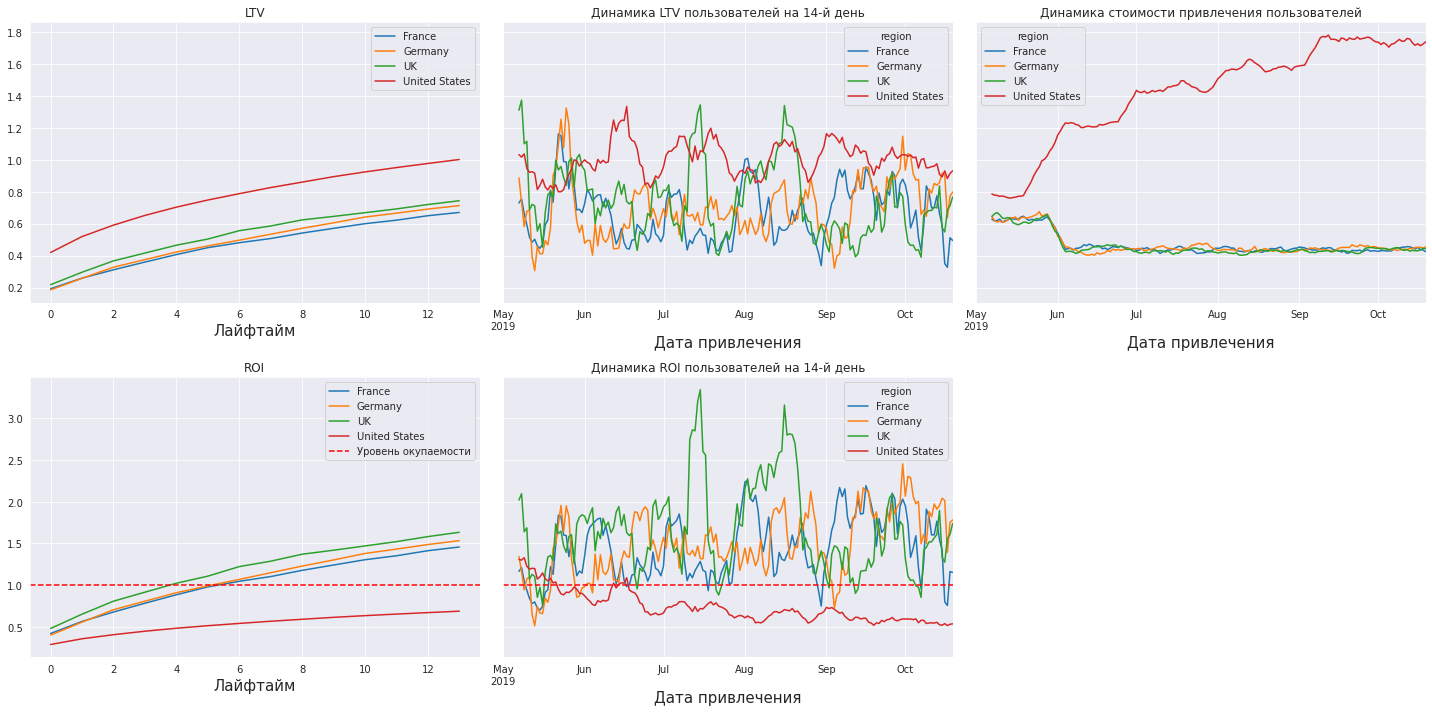

In [53]:
# расчитываю окупаемость рекламы с разбивкой по странам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_pay, orders, observation_date, horizon_days, dimensions=['region']
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

In [54]:
# немного проанализирую рекламу United States
usa_profiles = profiles_pay.query('region == "United States"')

In [55]:
# распределние пользователей из United States по устройствам
usa_profiles_dev = (
    usa_profiles 
    .groupby('device')
    .agg({'user_id' : 'count', 'payer' : 'sum'})
    .sort_values('user_id', ascending=False)
    .rename(columns={'user_id':'Количество пользователей', 'payer' : 'Платящие пользователи'})
)
usa_profiles_dev['% Платящих пользователей'] = (100 * usa_profiles_dev['Платящие пользователи'] 
                                                / usa_profiles_dev ['Количество пользователей']
                                               )
usa_profiles_dev['% Платящих пользователей'] = usa_profiles_dev['% Платящих пользователей'].round(2)
display(usa_profiles_dev)

,Количество пользователей,Платящие пользователи,% Платящих пользователей
device,,,
iPhone,27548,2654,9.63
Mac,15424,1507,9.77
Android,12436,1317,10.59
PC,6421,630,9.81


In [56]:
# распределние пользователей из United States по рекламным платформам
usa_profiles_ch = (
    usa_profiles
    .groupby('channel')
    .agg({'user_id' : 'count', 'payer' : 'sum'})
    .sort_values('user_id', ascending=False)
    .rename(columns={'user_id':'Количество пользователей', 'payer' : 'Платящие пользователи'})
)
usa_profiles_ch['% Платящих пользователей'] = (100 * usa_profiles_ch['Платящие пользователи'] 
                                               / usa_profiles_ch ['Количество пользователей']
                                              )
usa_profiles_ch['% Платящих пользователей'] = usa_profiles_ch['% Платящих пользователей'].round(2)
display(usa_profiles_ch)

,Количество пользователей,Платящие пользователи,% Платящих пользователей
channel,,,
FaceBoom,29144,3557,12.20
TipTop,19561,1878,9.60
RocketSuperAds,4448,352,7.91
MediaTornado,4364,156,3.57
YRabbit,4312,165,3.83


In [58]:
# немного проанализирую рекламу в Европе
usa_profiles = profiles_pay.query('region != "United States"')

In [59]:
# распределние пользователей из Европы по устройствам
usa_profiles_dev = (
    usa_profiles 
    .groupby('device')
    .agg({'user_id' : 'count', 'payer' : 'sum'})
    .sort_values('user_id', ascending=False)
    .rename(columns={'user_id':'Количество пользователей', 'payer' : 'Платящие пользователи'})
)
usa_profiles_dev['% Платящих пользователей'] = (100 * usa_profiles_dev['Платящие пользователи'] 
                                                / usa_profiles_dev ['Количество пользователей']
                                               )
usa_profiles_dev['% Платящих пользователей'] = usa_profiles_dev['% Платящих пользователей'].round(2)
display(usa_profiles_dev)

,Количество пользователей,Платящие пользователи,% Платящих пользователей
device,,,
PC,12732,664,5.22
Android,9405,465,4.94
iPhone,6334,318,5.02
Mac,3269,166,5.08


In [60]:
# распределние пользователей из Европы по рекламным платформам
usa_profiles_ch = (
    usa_profiles
    .groupby('channel')
    .agg({'user_id' : 'count', 'payer' : 'sum'})
    .sort_values('user_id', ascending=False)
    .rename(columns={'user_id':'Количество пользователей', 'payer' : 'Платящие пользователи'})
)
usa_profiles_ch['% Платящих пользователей'] = (100 * usa_profiles_ch['Платящие пользователи'] 
                                               / usa_profiles_ch ['Количество пользователей']
                                              )
usa_profiles_ch['% Платящих пользователей'] = usa_profiles_ch['% Платящих пользователей'].round(2)
display(usa_profiles_ch)

,Количество пользователей,Платящие пользователи,% Платящих пользователей
channel,,,
OppleCreativeMedia,8605,233,2.71
LeapBob,8553,262,3.06
WahooNetBanner,8553,453,5.30
AdNonSense,3880,440,11.34
lambdaMediaAds,2149,225,10.47


- Стоимость привлечения пользователей United States очень высокая. Стоимость привлечения пользователей других стран стабильно низкая. Исходя из графика можно сказать,что рекламная кампания в июне месяце была переориентирована на пользователей United States (это так же заметно по количеству платящих пользователей из United States).
- В тот же момент окупаемость пользователей из United States где то на уровне 70%, тогда как остальные страны демонстрируют окупаемость на уровне 150%, особенно хорошо себя проявляют пользователи из UK.В динамике заметно, что окупаемость пользователей из United States падает.

**United States:**
- FaceBoom, TipTop, RocketSuperAds, MediaTornado, YRabbit - работали только в этой стране.
- Половина пользователей iPhone и MAC из United States. Хорошую конверсию показывают пользователи на PC.

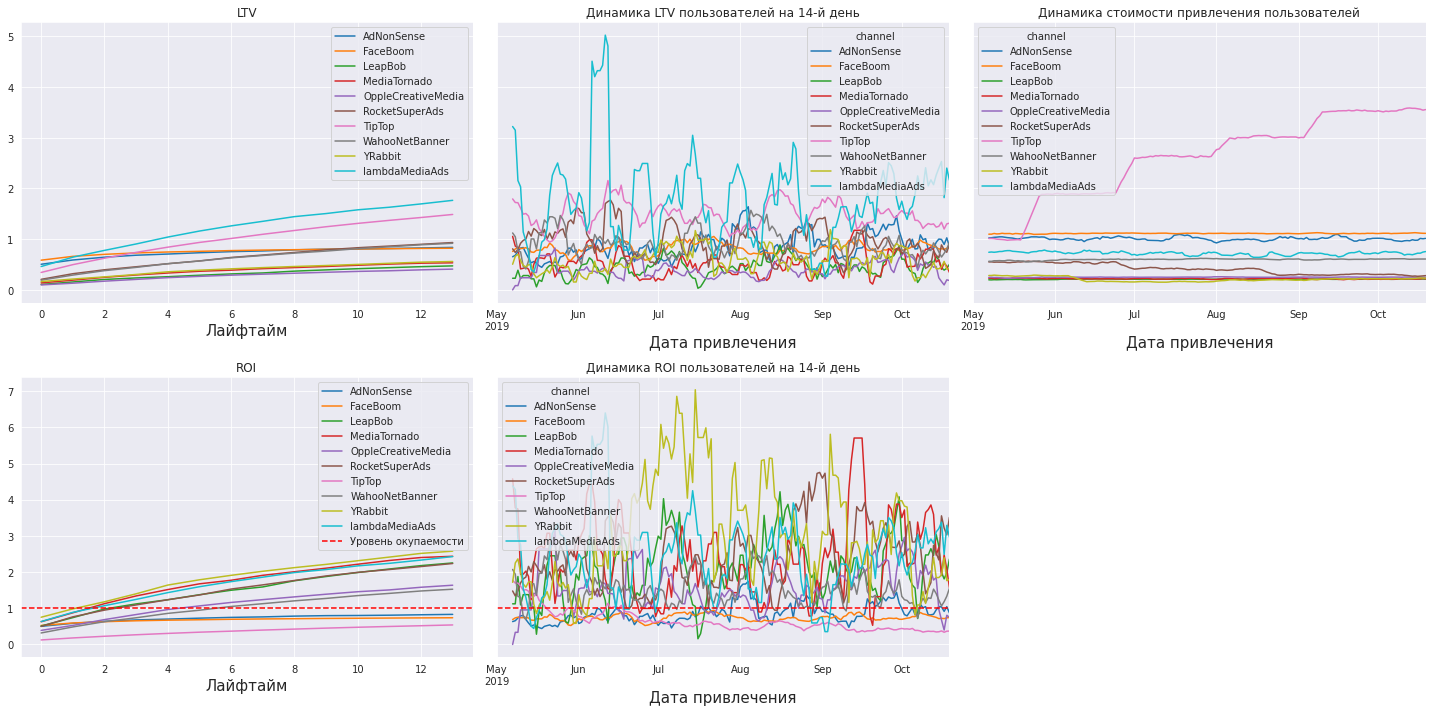

In [57]:
# расчитываю окупаемость рекламы с разбивкой по рекламным каналам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_pay, orders, observation_date, horizon_days, dimensions=['channel']
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

- Самая высокая стоимость привлечения пользователей через рекламную кампанию TipTop. Остальные кампании держаться в одной плотной группе. Ниже всего стоимость на рекламных платформах YRabbit, OppleCreativeMedia. Несмотря на большую стоимость привлечения пользователей через рекламную платформу TipTop, количество платящих пользователей чуть выше уровня органических пользователей.
- С самой низкой окупаемостью, на уровне 70% находится рекламная платформа TipTop. Чуть лучше,но все равно убыточные платформы FaceBoom и AdNonSense с окупаемостью приблизительно 80-85%.
- LTV лучше всего выглядит у  TipTop (что неудивительно, в виду того сколько денег тратится на рекламу на этой платформе) и lambdaMediaAds. 

**Подводя итоги по разделу:**
- В целом можно сказать,что рекламная кампания не окупается. Окупаемость рекламы приблизительно на уровне 80%.
- Негативное влияние на окупаемость оказывает сосредоточненность на стране United States, есть смысл перераспределить рекламу и на другие страны.
- Большие траты на рекламную платформу TipTop и FaceBoom не оправдывают себя. Необходимо сменить рекламную платформу.
- Очень слабое удержание неплатящих пользователей.Удержание платящих пользователей выглядит тоже не очень оптимистично. Необходимо расширить функционал приложения для неплатящих пользователей.
- Акцент на платформы iPhone и MAC приводит к проблема окупаемости. Количество платящих пользователей устройств на Android второе по величине, стоимость привлечения ниже, и хороший потенциал. Сделать больше акцент по привлечению пользователей на PC, единственные у которых окупаемость выше 100%.

### 6. Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Основные причины неэффективности привлечения пользователей:**
- Слабая конверсия пользователей начиная с 6-го дня.
- Слабая конверсия пользователей у половины рекламных каналов, как следствие недостаточности удержания пользователей (WahooNetBanner, YRabbit, MediaTornado, LeapBob, OppleCreativeMedia).
- реклама в United States - высокий САС, большой акцент на устройства iPhone и MAC, убыточность, слабое удержание платящих пользователей.
- Страны Germany, UK и France - мало рекламы, низкая конверсия  пользователей.
- Акцент на пользователей с устройствами Apple (iPhone и MAC).
- Недостаточность удержания неплатящих пользователей по всем направлениям.
- Очень низкая конверсия органических пользователей.
- Низкая конверсия пользователей на PC.
- Пользователи с iPhone и MAC сильное увеличение САС, как следствие убыточность.
- Пользователи на Android - убыточность.
- TipTop - очень высокий САС, убыточность, работа только по одной стране.
- Канал Faceboom - убыточность, работа только в одной стране, плохое удержание платящих пользователей.
- RocketSuperAds, MediaTornado - работа только по одной стране.
- Канал YRabbit - работа только по одной стране.
- Канал AdNonSense - убыточность, очень плохое удержание платящих пользователей.

**Рекомендации для отдела маркетинга:**
- Полностью отказаться от платформ TipTop, FaceBoom и AdNonSense, или значительно снизить привлечение пользователей через них. Расмотреть увеличение рекламы в первую очередь через платформу lambdaMediaAds. С точки зрения окупаемости стоит обратить внимание на рекламные платформы RocketSuperAds, LeapBob.
- Сместить  акцент с United States, и направить рекламные усилия на другие страны, в первую очередь на UK и Germany.
- Уделять больше рекламе для пользователей с устройствами на Android и PC.
- Увеличить время удержания неплатящих пользователей путем увеличения объема бесплатного контента в приложении, проведение акций или предоставление бонусов новым пользователям. Во-первых, потециально больше будет конверсия в платящих пользователей, во-вторых, чем больше людей пользуется приложением и дольше, тем чаще оно появляется "на слуху" ("сарафанное радио").По той же причине увеличить время удержания платящих пользователей, например путем уменьшения стоимости подписки, проведения специальных акций, внедрение долгосрочных абонементов.